**Heteroskedasticity Testing and solve problem:**  
   This part involves testing for heteroskedasticity to assess whether there's variance inconsistency in the model. Additionally, we employed Weighted Least Squares (WLS) to address this issue.

## Heteroskedasticity

In [ ]:

pip install statsmodels numpy pandas matplotlib seaborn


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.formula.api import ols

sns.set(style="whitegrid")

In [ ]:
pip install openpyxl

**Importing dataset**

In [3]:
#Read data
file_path = r"C:\Users\ADMIN\Documents\final_data_08_04.xlsx"
data = pd.read_excel(file_path)
df = pd.DataFrame(data)
df.head()

,Country Name,ISO,Year,Continent,Population (thousands),Life Expectancy (years),Ladder of life (Wellbeing) (0-10),Carbon Footprint (tCO2e),HPI,GDP per capita ($),GNI,Annual precipitation,Average years of schooling,Gini coefficient,Unemployment,Human Development Index
0,Albania,ALB,2012,7,2892.2,78.1,5.51,3.37,51.8,11228,4360,1391.6102,10.025110,0.289605,13.38,0.789
1,Albania,ALB,2014,7,2884.1,78.4,4.81,3.60,45.4,11587,4540,1417.2703,10.005746,0.345989,18.05,0.797
2,Albania,ALB,2015,7,2882.5,78.6,4.61,3.35,44.4,11878,4390,1184.5548,9.996064,0.327537,17.19,0.797
3,Albania,ALB,2016,7,2881.1,78.9,4.51,3.25,43.9,12292,4320,1565.3773,9.986382,0.337363,15.42,0.795
4,Albania,ALB,2017,7,2879.4,79.0,4.64,3.68,44.0,12771,4290,1175.3209,9.976700,0.330557,13.62,0.796


**Data Cleaning** 

In [4]:
df = df.drop_duplicates()
df.shape

(619, 16)

In [5]:
df.isnull().sum()

Country Name                         0
ISO                                  0
Year                                 0
Continent                            0
Population (thousands)               0
Life Expectancy (years)              0
Ladder of life (Wellbeing) (0-10)    0
Carbon Footprint (tCO2e)             0
HPI                                  0
GDP per capita ($)                   0
GNI                                  0
Annual precipitation                 0
Average years of schooling           0
Gini coefficient                     0
Unemployment                         0
Human Development Index              0
dtype: int64

In [6]:
df = pd.DataFrame(data)
#df = df[(df['GNI'] < 6100)] 
#đây là nhóm nước GNI thấp, trung bình: 6500<=GNI<= 31000, cao là GNI>31000

**OLS Regression**

In [44]:
df["ln_Annual precipitation"]= np.log(df["Annual precipitation"])
df['stan_gini'] = df['Gini coefficient'] * 100
#df['life_ex'] = df['Life Expectancy (years)'] /10
#df['HDI'] = df['Human Development Index'] 
X= df[["Human Development Index",'stan_gini','Unemployment', 'ln_Annual precipitation']]
X = sm.add_constant(X)
y = df["Human Development Index"]
model = sm.OLS(y, X).fit()
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     Human Development Index   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 1.138e+28
Date:                     Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                             17:11:14   Log-Likelihood:                 19044.
No. Observations:                      619   AIC:                        -3.808e+04
Df Residuals:                          614   BIC:                        -3.806e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [102]:
#import statsmodels.api as sm
#df["ln_Annual precipitation"]= np.log(df["Annual precipitation"])
#df['ln_GNI'] = np.log(df['GNI'])
#df['stan_gini'] = df['Gini coefficient'] * 100
#X = df[['Life Expectancy (years)', 'ln_GNI','ln_Annual precipitation', 'Average years of schooling', 'stan_gini','Unemployment']]
#X = sm.add_constant(X)
#y = df["HPI"]
#model = sm.OLS(y, X).fit()
#print(model.summary())


In [45]:
print(X)

     const  Human Development Index  stan_gini  Unemployment  \
0      1.0                    0.789  28.960484         13.38   
1      1.0                    0.797  34.598896         18.05   
2      1.0                    0.797  32.753733         17.19   
3      1.0                    0.795  33.736297         15.42   
4      1.0                    0.796  33.055663         13.62   
..     ...                      ...        ...           ...   
614    1.0                    0.815  39.464375          7.89   
615    1.0                    0.815  39.687112          8.34   
616    1.0                    0.818  39.676290          8.88   
617    1.0                    0.820  40.155584         10.35   
618    1.0                    0.814  40.776816         10.45   

     ln_Annual precipitation  
0                   7.238217  
1                   7.256488  
2                   7.077122  
3                   7.355882  
4                   7.069296  
..                       ...  
614           

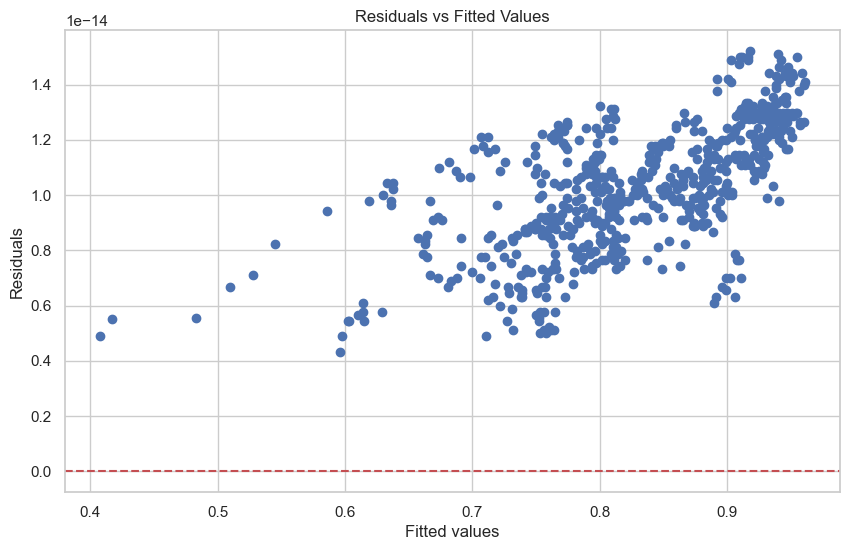

In [46]:
# 1. Visual inspection of residuals
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Biểu đồ hình quạt => Phương sai không đồng nhất

**Correlation values between each independent variable and the squared residuals**

Để check đâu là nguyên nhân chính gây ra heterosdasticity

In [47]:
# Tạo DataFrame chứa bình phương phần dư và các biến độc lập
residual_analysis = pd.DataFrame()
residual_analysis['resid_squared'] = model.resid**2

# Tính hệ số tương quan
correlations = {}
for var in X.columns:
    if var != 'const':  
        residual_analysis[var] = df[var]
        corr = residual_analysis['resid_squared'].corr(residual_analysis[var])
        correlations[var] = corr

# Hiển thị kết quả tương quan
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
for var, corr in sorted_correlations:
    print(f"{var}: {corr:.4f}")


stan_gini: -0.8623
Human Development Index: 0.6541
Unemployment: -0.1720
ln_Annual precipitation: -0.0754


Absolute correlation close to 0 means less siginficant impact on heteroskedasticity

**Carbon Footprint**, **GNI** are more likely to contribute to heteroskedasticity.

In [48]:
#Breuch-Pagan test; for significant level of 0.05

bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog) #p_value có tăng so với không chia data
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("Breusch-Pagan test:")
bp_results = [float(value) for value in bp_test]
res = dict(zip(labels, bp_results))

print(res)
if res['p-value'] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

Breusch-Pagan test:
{'Lagrange multiplier statistic': 607.9861732097012, 'p-value': 2.895809215873007e-130, 'f-value': 8473.519637143085, 'f p-value': 0.0}
Reject the null hypothesis of homoscedasticity


In [49]:
#Breusch Pagan Test
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np

# Kiểm định riêng lẻ cho từng biến. Với mỗi biến var, tạo một mô hình hồi quy đơn biến để test:
bp_results = {}
for var in X.columns:
    if var != 'const': 
        X_single = sm.add_constant(df[[var]])
        bp_test = het_breuschpagan(model.resid, X_single)
        bp_results[var] = bp_test[1]  # p-value

# Hiển thị kết quả theo thứ tự tăng dần của p-value
sorted_bp = sorted(bp_results.items(), key=lambda x: x[1])
for var, p_value in sorted_bp:
    significance = "Significant" if p_value < 0.05 else "Not significant"
    print(f"{var}: p-value = {p_value:.4f} ({significance})")

stan_gini: p-value = 0.0000 (Significant)
Human Development Index: p-value = 0.0000 (Significant)
Unemployment: p-value = 0.0000 (Significant)
ln_Annual precipitation: p-value = 0.0608 (Not significant)


p-value Analysis for Heteroskedasticity:

If p-value < 0.05: This indicates the presence of heteroskedasticity (result: "Significant").

If p-value ≥ 0.05: There is not enough evidence to reject the null hypothesis (result: "Not significant").

**Analysis Conclusion:**
The analysis shows that variables **Carbon Footprint, GNI** have a significant impact on heteroskedasticity. 

In [50]:
# White test; for significant level of 0.05 
import statsmodels.stats.diagnostic as smd
residuals = model.resid

white_test = smd.het_white(residuals, X)
labels = ['Test Statistic', 'p-value', 'F-statistic', 'F p-value']
print('White Test:')
white_results = [float(value) for value in white_test]
print(dict(zip(labels, white_results)))
if white_test[1] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

White Test:
{'Test Statistic': 618.4671208385442, 'p-value': 6.229303996335285e-123, 'F-statistic': 50072.212561282235, 'F p-value': 0.0}
Reject the null hypothesis of homoscedasticity


## Solve Heteroskedasticity

**WLS**

In [56]:
df["ln_Annual precipitation"]= np.log(df["Annual precipitation"])
df['stan_gini'] = df['Gini coefficient'] * 100
#df['life_ex'] = df['Life Expectancy (years)'] /10
#df['HDI'] = df['Human Development Index'] 
X= df[["Human Development Index",'stan_gini','Unemployment', 'ln_Annual precipitation']]
X = sm.add_constant(X)
y = df["Human Development Index"]

Try 1. The weight is the fitted value, inverse of the fitted values, inverse of square fitted value  obtained from the OLS model.

In [57]:

## add a intercept point
#w1 = model.fittedvalues
#w1 = 1 / (model.fittedvalues**2 + 1e-5) #p_value lớn nhất trng 3 cái
w1 = 1 / (model.fittedvalues + 1e-5)
model_wls_1 = sm.WLS(y, X, weights = w1) 
mod_res_1 = model_wls_1.fit() 
print(mod_res_1.summary())

residuals = mod_res_1.resid
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, mod_res_1.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("Breusch-Pagan test:")
res = dict(zip(labels, bp_test))
print(res)
if res['p-value'] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

                               WLS Regression Results                              
Dep. Variable:     Human Development Index   R-squared:                       1.000
Model:                                 WLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 2.059e+28
Date:                     Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                             17:13:36   Log-Likelihood:                 19186.
No. Observations:                      619   AIC:                        -3.836e+04
Df Residuals:                          614   BIC:                        -3.834e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Try 2. Ước lượng phương sai sai số dựa trên giá trị tuyệt đối của phần dư từ mô hình ban đầu. Bình phương các giá trị dự đoán này để tạo ra trọng số (weights) cho mô hình WLS.

In [58]:
model_residuals = model.resid
model_abs_resid = abs(model_residuals)
df["temp"] = model_abs_resid 
y_pred = model.fittedvalues

model_abs_resid = sm.OLS(df["temp"], sm.add_constant(y_pred)).fit()

# Get the fitted values from the new model
weights_2 = model_abs_resid.fittedvalues**2

# Use the fitted values as weights in a WLS model
model_wls_2 = sm.WLS(y, X, weights=weights_2)
result_wls_2 = model_wls_2.fit()
print(result_wls_2.summary())

residuals = result_wls_2.resid
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, result_wls_2.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("Breusch-Pagan test:")
res = dict(zip(labels, bp_test))
print(res)
if res['p-value'] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

                               WLS Regression Results                              
Dep. Variable:     Human Development Index   R-squared:                       1.000
Model:                                 WLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 2.857e+28
Date:                     Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                             17:13:40   Log-Likelihood:                 19402.
No. Observations:                      619   AIC:                        -3.879e+04
Df Residuals:                          614   BIC:                        -3.877e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Try 3. Như phần trên nhưng trọng số được lấy trực tiếp từ các giá trị dự đoán của mô hình OLS, mà không bình phương chúng.

In [59]:
df["temp"] = model_residuals**2  
y_pred = model.fittedvalues

model_abs_resid = sm.OLS(df["temp"], sm.add_constant(y_pred)).fit()

# Get the fitted values from the new model
weights_3 = model_abs_resid.fittedvalues

# Use the fitted values as weights in a WLS model
model_wls_2 = sm.WLS(y, X, weights=abs(weights_3))
result_wls_2 = model_wls_2.fit()
print(result_wls_2.summary())

residuals = result_wls_2.resid
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, result_wls_2.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("Breusch-Pagan test:")
res = dict(zip(labels, bp_test))
print(res)
if res['p-value'] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

                               WLS Regression Results                              
Dep. Variable:     Human Development Index   R-squared:                       1.000
Model:                                 WLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 3.483e+27
Date:                     Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                             17:13:43   Log-Likelihood:                 18757.
No. Observations:                      619   AIC:                        -3.750e+04
Df Residuals:                          614   BIC:                        -3.748e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

=> These methods of using weights do not eliminate heterokedascity. 

['Human Development Index",'stan_gini','Unemployment']
weights = 1/(df['stan_gini'])**2
weights = 1/(df['stan_gini'])
weights = (df['stan_gini'])**2

In [78]:

weights = (df['stan_gini'])


# Use the fitted values as weights in a WLS model
model_wls_2 = sm.WLS(y, X, weights=abs(weights))
result_wls_2 = model_wls_2.fit()
print(result_wls_2.summary())

residuals = result_wls_2.resid
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, result_wls_2.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("Breusch-Pagan test:")
res = dict(zip(labels, bp_test))
print(res)
if res['p-value'] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

                               WLS Regression Results                              
Dep. Variable:     Human Development Index   R-squared:                       1.000
Model:                                 WLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 1.201e+28
Date:                     Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                             17:17:47   Log-Likelihood:                 19048.
No. Observations:                      619   AIC:                        -3.809e+04
Df Residuals:                          614   BIC:                        -3.806e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

=> Đặt weights cho các var significant đều không hiệu quả